In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Ejemplo de regresión lineal

In [2]:
x_data = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10)

In [3]:
print(x_data)

[-0.69820101  1.02765658  1.8262257   4.66527175  5.19706956  4.39693208
  6.06260928  6.74263824  8.34790315  9.08573569]


In [4]:
y_data = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10)

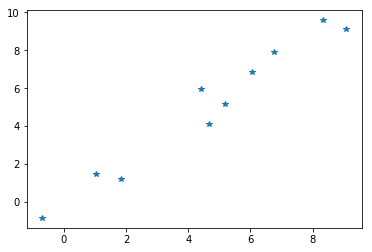

In [5]:
plt.plot(x_data, y_data, '*')

In [14]:
a_init = np.random.rand(1)[0]
b_init = np.random.rand(1)[0]
print('a=', a_init, ' b=', b_init)

a= 0.46209461160980636  b= 0.3436162874485623


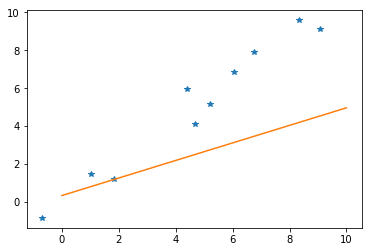

In [15]:
plt.plot(x_data, y_data, '*')
plt.plot(np.linspace(0, 10, 10), 
         a_init*np.linspace(0, 10, 10)+b_init)

### Variables

In [16]:
a = tf.Variable(a_init)
b = tf.Variable(b_init)

Instructions for updating:
Colocations handled automatically by placer.


In [17]:
error = 0

for x, y in zip(x_data, y_data):
    y_hat = a*x + b
    error += (y-y_hat)**2

In [18]:
print(error)

Tensor("add_19:0", shape=(), dtype=float64)


### Optimizador

In [19]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

### Initialize Variables

In [20]:
init = tf.global_variables_initializer()

### Entrenamiento

In [24]:
with tf.Session() as sess:
    sess.run(init)
    epochs = 100
    for i in range(epochs):
        sess.run(train)
        if i%10 == 0:
            print(sess.run(error))
    final_a, final_b = sess.run([a, b])

18.954360342328663
5.106176735538243
5.041686926500672
4.984173491233504
4.9328817136076255
4.887138550470163
4.8463437667704605
4.809962059364172
4.777516032844199
4.748579935228495


In [25]:
print(final_a)

1.0520236812136035


In [26]:
print(final_b)

0.21935552866139502


### Prueba

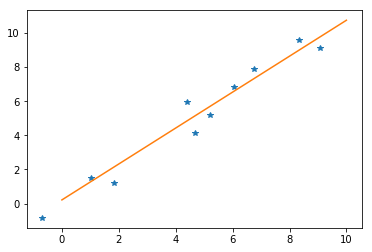

In [27]:
plt.plot(x_data, y_data, '*')
plt.plot(np.linspace(0, 10, 10), 
         final_a*np.linspace(0, 10, 10)+final_b)